In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#EDA

In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


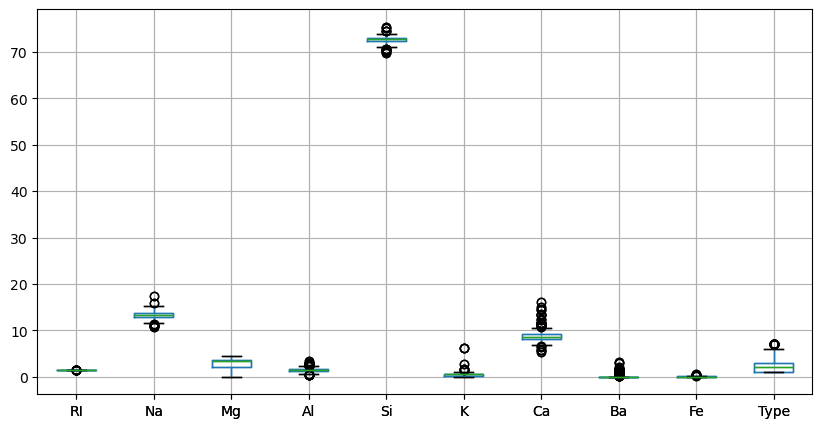

In [16]:
df.boxplot(figsize=(10,5))
plt.show()

In [18]:
#comparing the output of describe and boxplot func these outliers are ok

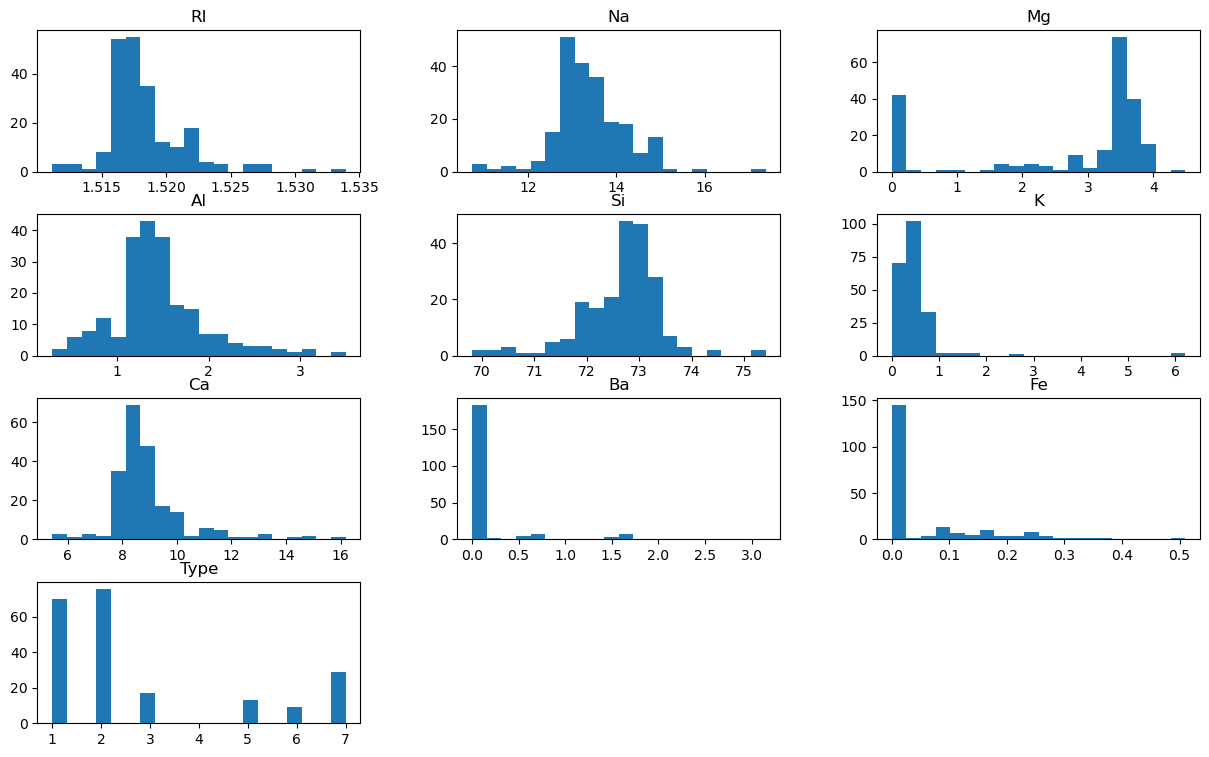

In [22]:
df.hist(bins=20,figsize=(15,9),grid=False)
plt.show()

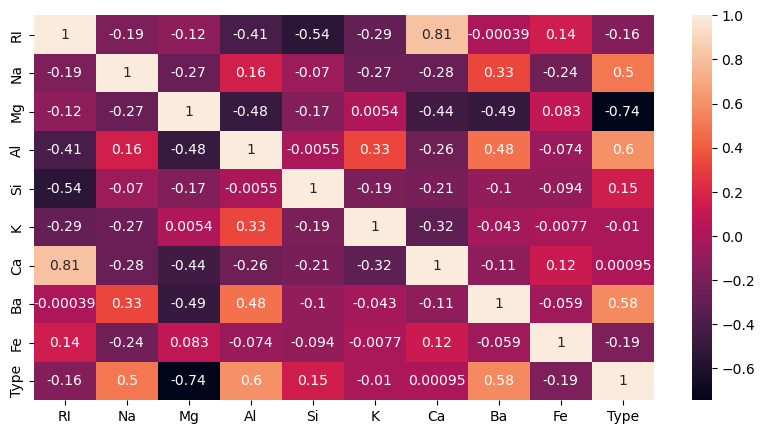

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Data Preprocessing

In [31]:
#no missing values and categorical variables

Random Forest

In [34]:
x=df.drop('Type',axis=1)
y=df['Type']

In [36]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [38]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [52]:
xtest

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
108,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24
51,1.51926,13.20,3.33,1.28,72.36,0.60,9.14,0.00,0.11
33,1.51753,12.57,3.47,1.38,73.39,0.60,8.55,0.00,0.06
59,1.51754,13.39,3.66,1.19,72.79,0.57,8.27,0.00,0.11
152,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.00,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
31,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00


In [54]:
rfc=RandomForestClassifier(random_state=10)
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
ypred

array([6, 7, 7, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 7,
       2, 1, 2, 3, 2, 2, 2, 1, 5, 6, 1, 1, 1, 1, 2, 3, 2, 2, 1, 7, 7],
      dtype=int64)

In [58]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.80      0.84      0.82        19
           2       0.69      0.75      0.72        12
           3       0.50      0.17      0.25         6
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       0.80      1.00      0.89         4

    accuracy                           0.74        43
   macro avg       0.72      0.79      0.72        43
weighted avg       0.73      0.74      0.72        43



Bagging

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt=DecisionTreeClassifier()

In [75]:
baggingmodel=BaggingClassifier(dt,n_estimators=42)

In [77]:
baggingmodel.fit(xtrain,ytrain)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=42)

In [79]:
ypred1=baggingmodel.predict(xtest)

In [81]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           1       0.79      0.79      0.79        19
           2       0.64      0.75      0.69        12
           3       0.50      0.17      0.25         6
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       0.80      1.00      0.89         4

    accuracy                           0.72        43
   macro avg       0.71      0.78      0.71        43
weighted avg       0.71      0.72      0.70        43



BOOSTING

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
bc=DecisionTreeClassifier()

In [90]:
boostmodel=AdaBoostClassifier(bc,n_estimators=42)

In [92]:
boostmodel.fit(xtrain,ytrain)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=42)

In [94]:
ypred3=boostmodel.predict(xtest)

In [96]:
print(classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           1       0.88      0.74      0.80        19
           2       0.54      0.58      0.56        12
           3       0.80      0.67      0.73         6
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         1
           7       0.80      1.00      0.89         4

    accuracy                           0.72        43
   macro avg       0.67      0.83      0.72        43
weighted avg       0.75      0.72      0.72        43



Questions:

Bagging: It is a homogeneous weak learners’ model that learns from each other independently in parallel and combines them for determining the model average.

Boosting: It is also a homogeneous weak learners’ model but works differently from Bagging. In this model, learners learn sequentially and adaptively to improve model predictions of a learning algorithm.

we can handle imbalance data by performing oversmapling or undersamplig technique to balance the data and go for f1score,preciison,recall to check the performance as there is no mistake in the model for the results